<a href="https://colab.research.google.com/github/Bahaakhalled/Tabular-Playground-Series---Sep-2022/blob/main/Tabular_Playground_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [131]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
my_file = Path("train.csv")
if my_file.is_file()==False:
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Tabular-Playground-Series---Sep-2022/main/train.csv'
  !wget 'https://raw.githubusercontent.com/Bahaakhalled/Tabular-Playground-Series---Sep-2022/main/test.csv'
tab=pd.read_csv('train.csv')
tab.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [133]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65490 entries, 0 to 65489
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    65490 non-null  int64 
 1   date      65490 non-null  object
 2   country   65490 non-null  object
 3   store     65490 non-null  object
 4   product   65490 non-null  object
 5   num_sold  65490 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.0+ MB


In [134]:
tab.nunique()

row_id      65490
date         1365
country         6
store           2
product         4
num_sold      677
dtype: int64

In [135]:
ctab=tab.copy()
ctab['date']=pd.to_datetime(ctab['date'], utc=False)
ctab.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,row_id,date,country,store,product,num_sold
count,65490.000000,65490,65490,65490,65490,65490.000000
unique,NaN,1365,6,2,4,NaN
top,NaN,2017-01-01 00:00:00,Belgium,KaggleMart,Kaggle Advanced Techniques,NaN
freq,NaN,48,10920,32746,16373,NaN
first,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2020-09-26 00:00:00,NaN,NaN,NaN,NaN
mean,32744.500000,NaN,NaN,NaN,NaN,191.522110
std,18905.478902,NaN,NaN,NaN,NaN,126.149754
min,0.000000,NaN,NaN,NaN,NaN,3.000000
25%,16372.250000,NaN,NaN,NaN,NaN,93.000000


In [136]:
ctab.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [137]:
ctab.duplicated().sum()

0

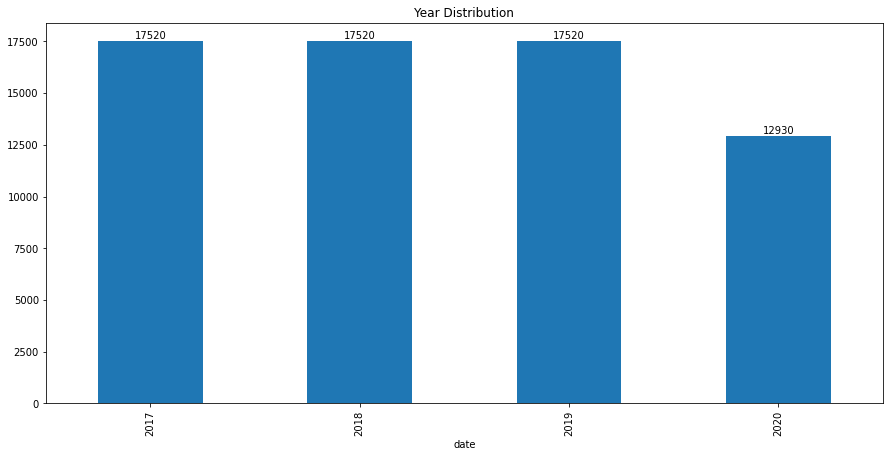

In [138]:
plt.figure(figsize=(15,7))
graph=ctab.groupby(ctab["date"].dt.year).row_id.count().plot(kind="bar")
graph.set_title('Year Distribution')
for i in graph.containers:
    graph.bar_label(i,)

Text(0.5, 1.0, 'Numbers Sold Distribution')

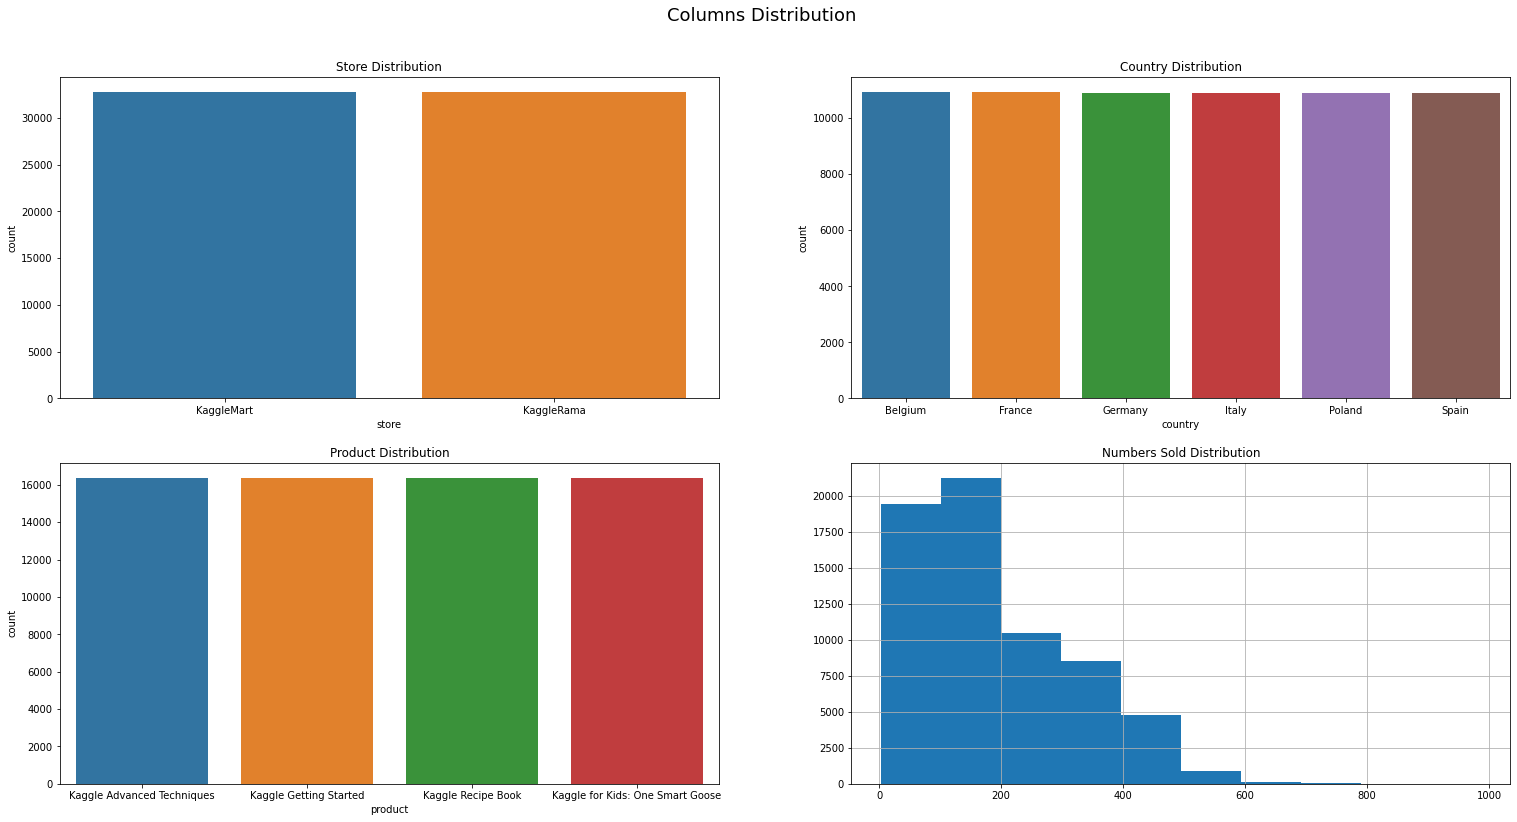

In [139]:
fig, axes = plt.subplots(2, 2,figsize=(26,13))
plt.text(x=0.5, y=0.94, s="Columns Distribution", fontsize=18, ha="center", transform=fig.transFigure)
sns.countplot(x=ctab['store'],ax=axes[0,0])
axes[0,0].set_title('Store Distribution')
sns.countplot(x=ctab['country'],ax=axes[0,1])
axes[0,1].set_title('Country Distribution')
sns.countplot(x=ctab['product'],ax=axes[1,0])
axes[1,0].set_title('Product Distribution')
ctab.num_sold.hist(ax=axes[1,1])
axes[1,1].set_title('Numbers Sold Distribution')

for each product sales year month weekends momken

Text(0.5, 1.0, 'Numbers Sold in Countries based on Store')

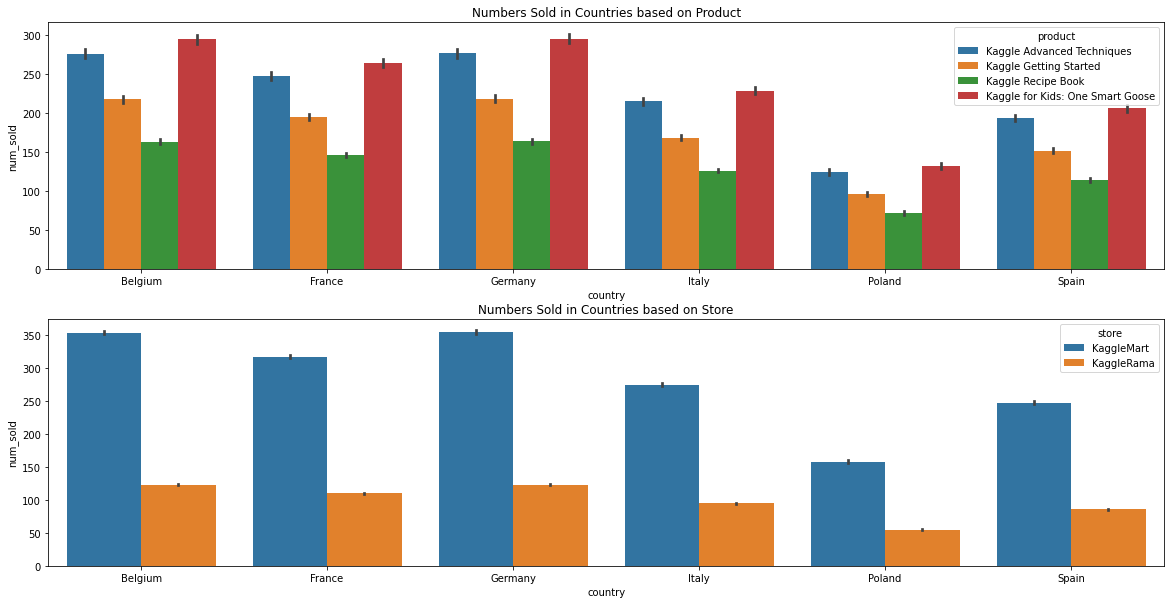

In [140]:
fig, axes = plt.subplots(2, 1,figsize=(20,10))
sns.barplot(ax=axes[0],data=ctab, x="country",y='num_sold',hue='product')
axes[0].set_title('Numbers Sold in Countries based on Product')
sns.barplot(ax=axes[1],data=ctab, x="country",y='num_sold',hue='store')
axes[1].set_title('Numbers Sold in Countries based on Store')


In [141]:
dayofweek=ctab["date"].apply(lambda m : m.strftime('%A'))
ctab['weekday']=dayofweek
ctab["Month"]=ctab["date"].dt.month_name()
ctab["Year"]=ctab["date"].dt.year

<AxesSubplot:title={'center':'Year'}, xlabel='Year'>

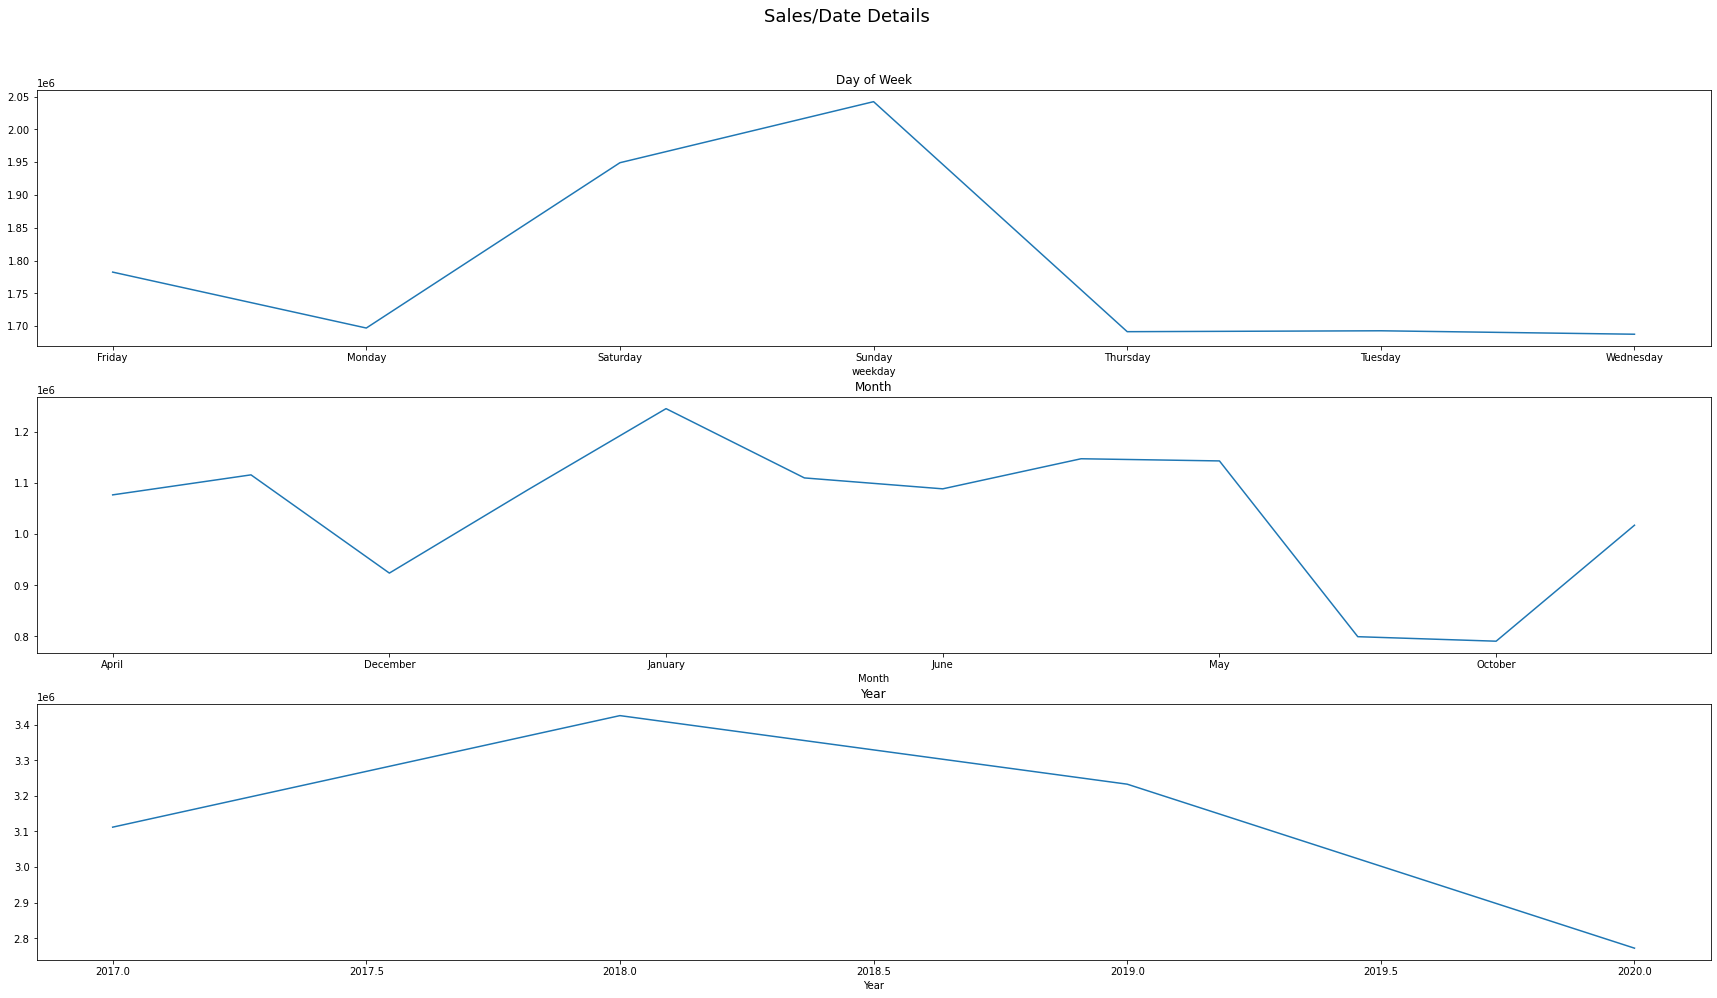

In [142]:
fig, axes = plt.subplots(3, 1,figsize=(30,16))
plt.text(x=0.5, y=0.94, s="Sales/Date Details", fontsize=18, ha="center", transform=fig.transFigure)
ctab.groupby('weekday').num_sold.sum().plot(title='Day of Week',ax=axes[0])
ctab.groupby('Month').num_sold.sum().plot(title='Month',ax=axes[1])
ctab.groupby('Year').num_sold.sum().plot(title='Year',ax=axes[2])

In [143]:
ctab.groupby(['Year','country']).num_sold.sum()

Year  country
2017  Belgium    681299
      France     598370
      Germany    685734
      Italy      499067
      Poland     213923
      Spain      433770
2018  Belgium    749414
      France     656033
      Germany    751936
      Italy      545664
      Poland     243751
      Spain      478626
2019  Belgium    708339
      France     615270
      Germany    707791
      Italy      512516
      Poland     239428
      Spain      449535
2020  Belgium    463554
      France     464589
      Germany    461077
      Italy      462334
      Poland     462581
      Spain      458182
Name: num_sold, dtype: int64

In [144]:
ctab.groupby(['store','product']).num_sold.sum()

store       product                         
KaggleMart  Kaggle Advanced Techniques          2706576
            Kaggle Getting Started              2126233
            Kaggle Recipe Book                  1595955
            Kaggle for Kids: One Smart Goose    2884821
KaggleRama  Kaggle Advanced Techniques           938698
            Kaggle Getting Started               737194
            Kaggle Recipe Book                   552602
            Kaggle for Kids: One Smart Goose    1000704
Name: num_sold, dtype: int64

I tried Scaling but gave the same results

In [145]:
ctab_dummied=pd.get_dummies(ctab)
X=ctab_dummied.drop(['row_id','num_sold','date'],axis=1)
y=ctab_dummied['num_sold']
X

,Year,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2017,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2017,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2017,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2017,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2017,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65485,2020,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
65486,2020,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
65487,2020,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
65488,2020,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def smape(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

def predictmodels(clf_A,clf_B,clf_C,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  results = {}
  df = pd.DataFrame()
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      clf = clf.fit(X_train, y_train)
      try:
        predictions_test = clf.predict(X_test)
      except:
        predictions_test = clf_A.predict(X_test)

      row={'SMAPE': smape(y_test,predictions_test)}
      rows=[smape(y_test,predictions_test)]
      d = {clf_name: row}
      if df.empty:
        df=pd.DataFrame(data=d)
      else:
        df[clf_name]=rows
  return df

In [147]:
predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X,y)

Training set has 52392 samples.
Testing set has 13098 samples.



,LinearRegression,Lasso,PolynomialFeatures
SMAPE,32.035884,28.784484,32.035884


In [148]:
predictmodels(DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3),linear_model.BayesianRidge(),X,y)

Training set has 52392 samples.
Testing set has 13098 samples.



,DecisionTreeRegressor,RandomForestRegressor,BayesianRidge
SMAPE,7.417397,7.183583,31.674781


In [26]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

predictmodels(xgb.XGBClassifier(random_state=3),AdaBoostRegressor(random_state=3),GradientBoostingRegressor(random_state=3),X,y)

Training set has 52392 samples.
Testing set has 13098 samples.



,XGBClassifier,AdaBoostRegressor,GradientBoostingRegressor
SMAPE,14.037344,34.356714,12.639686


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

In [258]:
def Gridsrch(clf,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  parameters={'n_estimators':[700,1000],'min_samples_split':[2],'min_samples_leaf':[4]}
  scorer=make_scorer(smape)
  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(smape(y_test,predictions)))
  print(str(clf) +" after Optimization: " + str(smape(y_test,best_predictions)))
  print(grid_fit.best_params_)
  return grid_fit

In [259]:
grid_fit=Gridsrch(RandomForestRegressor(random_state=3),X,y)

RandomForestRegressor(random_state=3) before Optimization: 7.183583400826953
RandomForestRegressor(random_state=3) after Optimization: 6.682175709578122
{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 700}


In [260]:
grid_fit.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 700}

In [261]:
results=pd.DataFrame(grid_fit.cv_results_)
results.sort_values(by='mean_test_score',ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,67.441903,0.259833,1.901449,0.037193,4,2,1000,"{'min_samples_leaf': 4, 'min_samples_split': 2...",6.676965,6.770383,6.715587,6.746553,6.712003,6.724298,0.031895,2
0,47.710962,0.677108,1.337729,0.023689,4,2,700,"{'min_samples_leaf': 4, 'min_samples_split': 2...",6.679224,6.772258,6.717089,6.747533,6.713673,6.725955,0.031695,1


RandomForestRegressor(random_state=3) after Optimization: 6.937378054568221
{'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 30}

6.741796	4	2	60


4	2	200 6.731394

4	2	500 6.726898


Text(0.5, 0, 'Random Forest Feature Importance')

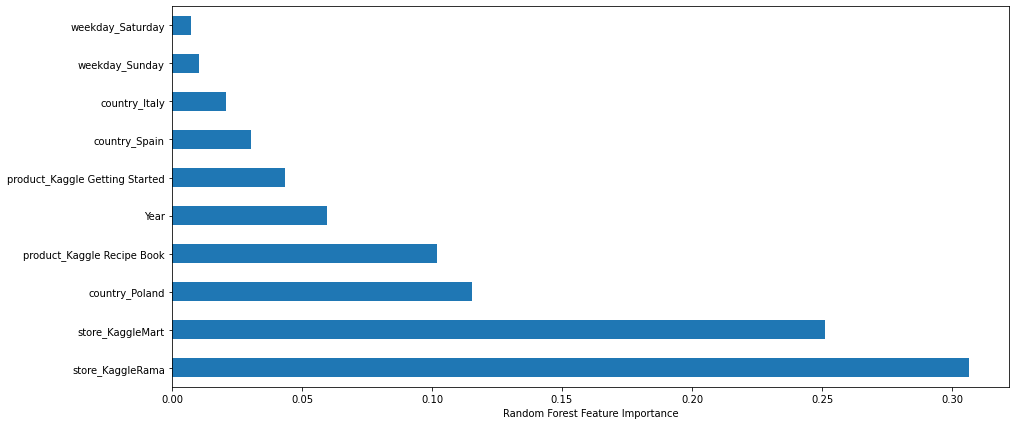

In [163]:
plt.figure(figsize=(15,7))
feat_importances = pd.Series(grid_fit.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")

In [262]:
test1=pd.read_csv('test.csv')

In [263]:
test1.shape

(17520, 5)

In [264]:
c_test=test1.copy()
c_test=c_test.replace('Belg', 'Belgium')

In [265]:
c_test=c_test.dropna(axis=0)

In [266]:
c_test['date']=pd.to_datetime(c_test['date'], utc=False)
dayofweek=c_test["date"].apply(lambda m : m.strftime('%A'))
c_test['weekday']=dayofweek
c_test["Month"]=c_test["date"].dt.month_name()
c_test["Year"]=c_test["date"].dt.year

In [267]:
c_test=pd.get_dummies(c_test)
X_pred=c_test.drop(['row_id','date'],axis=1)

In [268]:
X_pred.columns.difference(X.columns)

Index([], dtype='object')

In [269]:
X.columns.difference(X_pred.columns)

Index([], dtype='object')

In [270]:
grid_fit.best_estimator_

RandomForestRegressor(min_samples_leaf=4, n_estimators=700, random_state=3)

In [271]:
test=RandomForestRegressor(min_samples_leaf=4, n_estimators=700, random_state=3)

In [272]:
test.fit(X,y)

RandomForestRegressor(min_samples_leaf=4, n_estimators=700, random_state=3)

In [273]:
predictions=test.predict(X_pred)

In [274]:
res=pd.DataFrame(predictions.astype(int),columns=['num_sold']).reset_index()

In [275]:
res.insert(0, 'row_id', res['index'])
res=res.drop('index',axis=1)

In [276]:
res['row_id']=res['row_id']+70128
res

,row_id,num_sold
0,70128,439
1,70129,310
2,70130,272
3,70131,450
4,70132,146
...,...,...
17515,87643,416
17516,87644,122
17517,87645,105
17518,87646,69


In [277]:
res.to_csv("submission.csv", index=False)